In [1]:
import osmnx as ox
import networkx
import geopandas as gp
import matplotlib.pyplot as plt

In [3]:
portland = (45.523064,-122.676483)

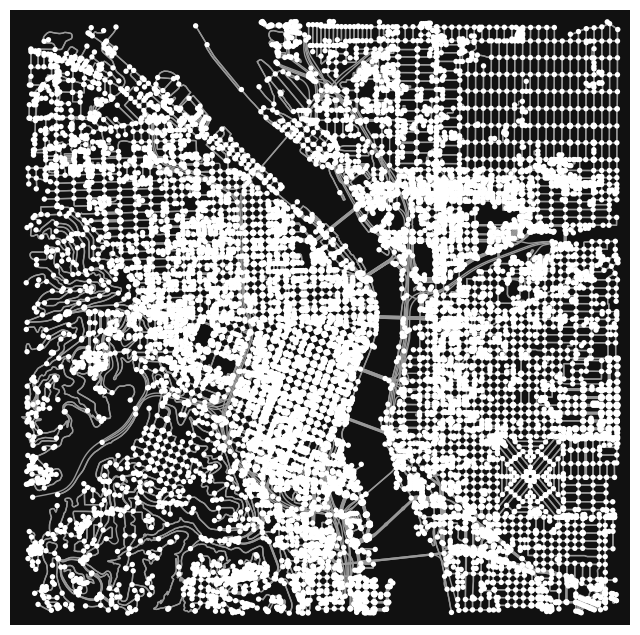

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [6]:
base_map = ox.graph_from_point(portland, dist = 3000)
ox.plot_graph(base_map)

In [7]:
base_map_proj = ox.project_graph(base_map)
nodes_proj = ox.graph_to_gdfs(base_map_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

35688548.77100197

In [8]:
ox.basic_stats(base_map_proj, area=graph_area_m, clean_int_tol=15)

{'n': 15980,
 'm': 43815,
 'k_avg': 5.483729662077597,
 'edge_length_total': 1901964.7009999938,
 'edge_length_avg': 43.40898553006947,
 'streets_per_node_avg': 3.110075093867334,
 'streets_per_node_counts': {0: 0,
  1: 1880,
  2: 131,
  3: 8472,
  4: 5351,
  5: 139,
  6: 7},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.11764705882352941,
  2: 0.008197747183979975,
  3: 0.530162703379224,
  4: 0.33485607008760954,
  5: 0.008698372966207759,
  6: 0.00043804755944931164},
 'intersection_count': 14100,
 'street_length_total': 1088614.902000002,
 'street_segment_count': 24718,
 'street_length_avg': 44.04138287887378,
 'circuity_avg': 1.0712331048234036,
 'self_loop_proportion': 0.002751031636863824,
 'clean_intersection_count': 4064,
 'node_density_km': 447.76267319068563,
 'intersection_density_km': 395.08471163884025,
 'edge_density_km': 53293.416698002526,
 'street_density_km': 30503.198910809588,
 'clean_intersection_density_km': 113.8740615673934}